# Welcome to Reece Boyce's Jupyter Notebook: 

#### This Code is housing my portion of analysis and coding for our final Capstone project!

###### Importing processes, and loading data!

In [535]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [548]:
df = pd.read_csv('Files/bom.movie_gross.csv.gz')
df_1 = pd.read_csv('Files/rt.movie_info.tsv.gz', sep='\t')
df_2 = pd.read_csv('Files/tmdb.movies.csv.gz')
df_3 = pd.read_csv('Files/rt.reviews.tsv.gz', sep='\t', encoding='latin-1')
df_4 = pd.read_csv('Files/tn.movie_budgets.csv.gz')

###### Getting an Idea of the data we are working with.

In [508]:
#Filtering info to get an idea of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [509]:
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [510]:
df.isnull().sum()
# df.sort_values(by='domestic_gross', ascending=False)

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [511]:
df['foreign_gross']=df['foreign_gross'].str.replace(',', '')


In [512]:
# df['foreign_gross'].replace(to_replace='NaN',value=0, inplace=True)
# df['foreign_gross'].fillna(value=0, inplace=True)

In [513]:
df.foreign_gross = df.foreign_gross.astype(float)

###### Some movies dont air domestically and vica versa! Hence we can clean and plot the seperately.

In [514]:
df['domestic_gross'].fillna(value=0, inplace=True)
df['foreign_gross'].fillna(value=0, inplace=True)

In [515]:
df['studio'].fillna(value='Unknown', inplace=True)

In [516]:
df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [517]:
# group_df = df.groupby('studio', axis=0).sum()
# group_df.replace(to_replace='NaN',value=0, inplace=True)
# group_df.fillna(value=0, inplace=True)
# group_df
df.groupby('studio', axis=0).sum()

,domestic_gross,foreign_gross,year
studio,,,
3D,6100000.0,9900000.0,2010
A23,164200.0,0.0,4024
A24,324194200.0,238462200.0,98754
ADC,248200.0,0.0,4032
AF,2142900.0,3500000.0,12080
...,...,...,...
XL,458000.0,0.0,4027
YFG,1100000.0,0.0,2016
Yash,31631400.0,272825100.0,28194


In [450]:
df.groupby('studio', axis=0).sum().sort_values(['domestic_gross'],ascending=False).head(10)

,domestic_gross,foreign_gross,year
studio,,,
BV,1.841903e+10,2.579385e+10,213451
Uni.,1.290239e+10,1.685477e+10,296082
WB,1.216805e+10,1.866790e+10,281941
Fox,1.094950e+10,2.005587e+10,273882
Sony,8.459683e+09,1.394535e+10,221575
Par.,7.685871e+09,1.186338e+10,203417
LGF,4.118963e+09,4.482619e+09,207437
WB (NL),3.995700e+09,6.339000e+09,90644
LG/S,2.078200e+09,3.353724e+09,82599


<AxesSubplot:xlabel='studio'>

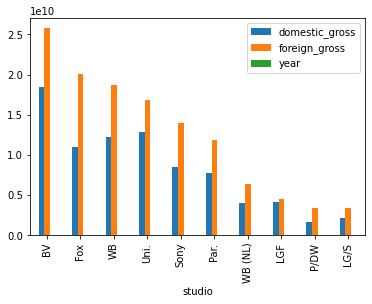

In [505]:
domestic_highest_gross = df.groupby(['studio'], axis=0).sum().sort_values(['foreign_gross'],ascending=False).head(10)
domestic_highest_gross.plot(kind='bar')

###### Part Two

In [543]:
df_1.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [567]:
merged_stuff = pd.merge(df_1, df_3, how='left', on='id')
merged_stuff.head()

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0.0,Patrick Nabarro,"November 10, 2018"
2,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0.0,io9.com,"May 23, 2018"
3,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0.0,Stream on Demand,"January 4, 2018"
4,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0.0,MUBI,"November 16, 2017"


In [568]:
merged_stuff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54857 entries, 0 to 54856
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            54857 non-null  int64  
 1   synopsis      54680 non-null  object 
 2   rating_x      54769 non-null  object 
 3   genre         54764 non-null  object 
 4   director      49339 non-null  object 
 5   writer        45426 non-null  object 
 6   theater_date  53411 non-null  object 
 7   dvd_date      53411 non-null  object 
 8   currency      33351 non-null  object 
 9   box_office    33351 non-null  object 
 10  runtime       54001 non-null  object 
 11  studio        40204 non-null  object 
 12  review        48869 non-null  object 
 13  rating_y      40915 non-null  object 
 14  fresh         54432 non-null  object 
 15  critic        51710 non-null  object 
 16  top_critic    54432 non-null  float64
 17  publisher     54123 non-null  object 
 18  date          54432 non-nu